## Observations and Insights 

> - The response to the treatment regimen `Capomulin`, is more promising as the days passby on few mice.<br><br>
> - The bar chart shows that the treatment regimens `Capomulin`(230 measurements) and `Ramicane`(228 measurements) has more measurements than other treatment regimens. <br> <br>
> - Based on the calculation of IQR, quartiles and outliers, the treatment regimen's data of `Capomulin, Ramicane, and Ceftamin` doesnot have any outliers. Whereas `Infubinol`, has an outlier(the value is less the lower bound).<br><br>
> - The scatter plot generated between mouse weight and average tumor volume for treatment regimen,Capomulin shows that points are close to each other. It show a strong relationship between them. The correlation coefficient calculated proves the same.<br><br>
> - The correlation coefficient between mouse weight and average tumor volume is <strong>0.84</strong>. Since it is greater than 0.7, the mouse weight and average tumor volume has strong positive correlation.<br>

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

%matplotlib notebook

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_complete = pd.merge(mouse_metadata,study_results,how="outer",on="Mouse ID")

# Display the data table for preview
mouse_study_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [46]:
# Checking the number of mice.
number_of_mice = mouse_metadata["Mouse ID"].count()
print(f'The total number of mice: {number_of_mice}')

The total number of mice: 249


In [47]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_timepoint = mouse_study_complete[mouse_study_complete.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]

duplicate_mice_id = duplicate_timepoint["Mouse ID"].unique()
print("The duplicated Mice ID is: " + duplicate_mice_id)

['The duplicated Mice ID is: g989']


In [48]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [49]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean_data = mouse_study_complete.drop_duplicates(['Mouse ID','Timepoint'],keep= 'last')

mouse_study_clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [50]:
# Checking the number of mice in the clean DataFrame.
number_of_mice2 = mouse_study_clean_data['Mouse ID'].nunique()
print(f'The number of mice in cleaned data: {number_of_mice2}')

The number of mice in cleaned data: 249


## Summary Statistics

In [51]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
grouped_regimen=mouse_study_clean_data.groupby(['Drug Regimen'])

Tumor_volume_Mean1 = grouped_regimen["Tumor Volume (mm3)"].mean()
Tumor_volume_Median1 = grouped_regimen["Tumor Volume (mm3)"].median()
Tumor_volume_Variance1 = grouped_regimen["Tumor Volume (mm3)"].var()
Tumor_volume_std_deviation1 = grouped_regimen["Tumor Volume (mm3)"].std()
Tumor_volume_SEM1 = grouped_regimen["Tumor Volume (mm3)"].sem()

summary_stats = {"Tumor_volume_Mean" : Tumor_volume_Mean1,
                 "Tumor_volume_Median" : Tumor_volume_Median1,
                 "Tumor_volume_Variance" : Tumor_volume_Variance1,
                 "Tumor_volume_std_deviation" : Tumor_volume_std_deviation1,
                 "Tumor_volume_SEM" : Tumor_volume_SEM1}

summary_stats_df = pd.DataFrame(summary_stats)
summary_stats_df

,Tumor_volume_Mean,Tumor_volume_Median,Tumor_volume_Variance,Tumor_volume_std_deviation,Tumor_volume_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = mouse_study_clean_data.groupby(['Drug Regimen']).agg(Tumor_volume_Mean=('Tumor Volume (mm3)','mean'),
                                                                    Tumor_volume_Median=('Tumor Volume (mm3)','median'),
                                                                    Tumor_volume_Variance=('Tumor Volume (mm3)','var'),
                                                                    Tumor_volume_std_deviation=('Tumor Volume (mm3)','std'),
                                                                    Tumor_volume_SEM=('Tumor Volume (mm3)','sem'))

summary_stats_agg_df=pd.DataFrame(summary_stats_agg)
summary_stats_agg_df

,Tumor_volume_Mean,Tumor_volume_Median,Tumor_volume_Variance,Tumor_volume_std_deviation,Tumor_volume_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


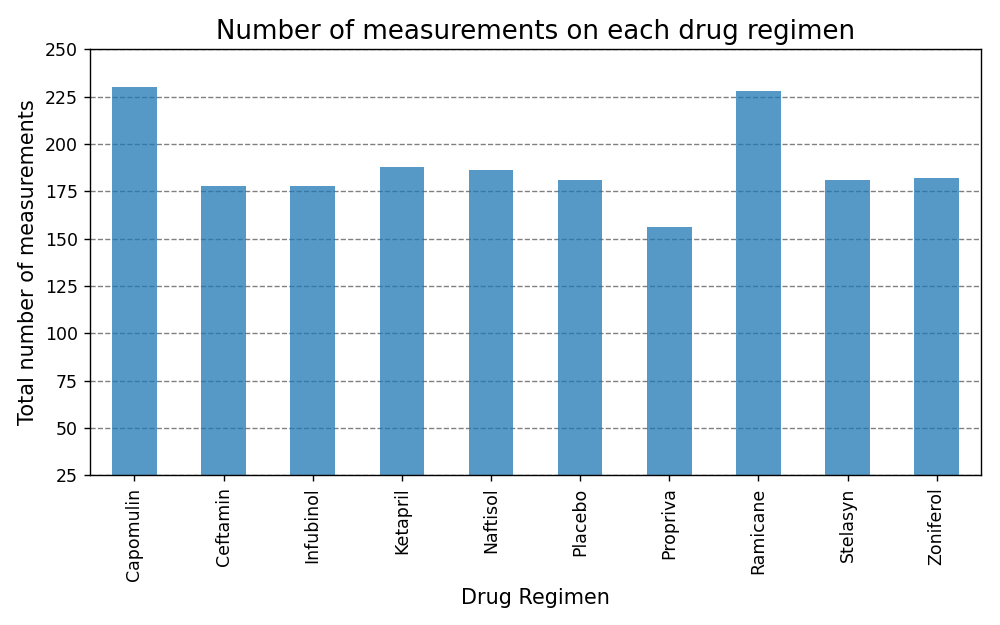

In [74]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
num_of_measurments = mouse_study_clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].count()

fig1,ax1 = plt.subplots()
ax1.pd_bar_chart = num_of_measurments.plot(kind="bar",figsize=(8,5),alpha=0.75)

ax1.set_xlabel("Drug Regimen",fontsize=12)
ax1.set_ylabel("Total number of measurements", fontsize = 12)
ax1.set_title("Number of measurements on each drug regimen", fontsize = 15)
ax1.set_ylim(25,250)
ax1.set_axisbelow(True)
ax1.yaxis.grid(color='gray', linestyle='dashed')


plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


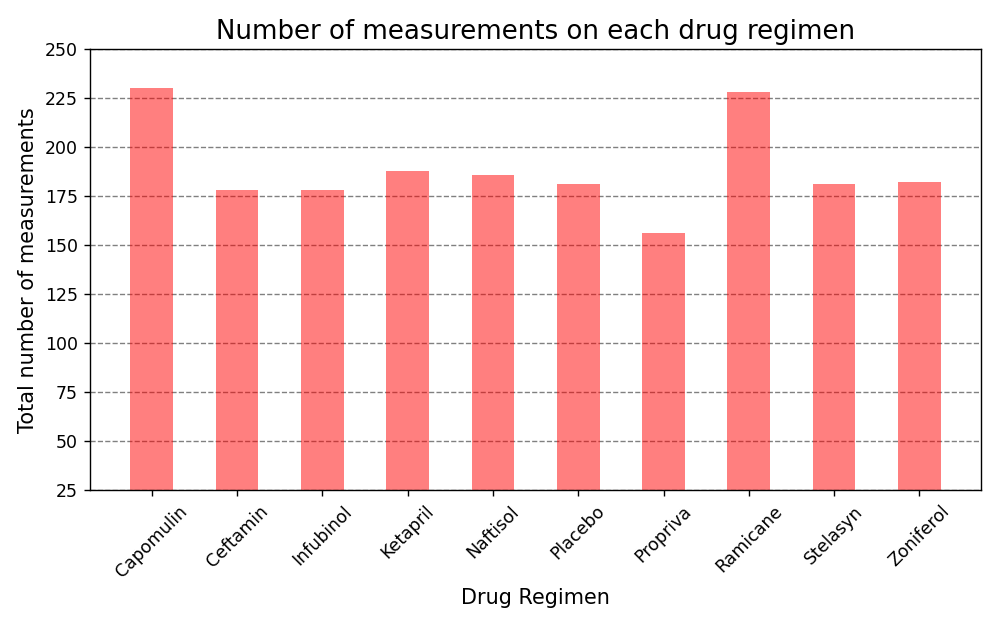

In [73]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
total_measurments1 = mouse_study_clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].count().reset_index(name ='n_of_measurements')

#x_axis = total_measurments1["Drug Regimen"]
y_axis = total_measurments1["n_of_measurements"]

x_axis = np.arange(len(total_measurments1))
tick_locations = [value for value in x_axis]

fig1,ax2 = plt.subplots(1,1,figsize=(8,5))
ax2.bar(x_axis,y_axis,color = 'r',alpha = 0.5,width = 0.5)

ax2.set_xlabel("Drug Regimen",fontsize=12)
ax2.set_ylabel("Total number of measurements", fontsize = 12)
ax2.set_title("Number of measurements on each drug regimen", fontsize = 15)
plt.xticks(tick_locations,total_measurments1["Drug Regimen"],rotation = 45)
ax2.set_ylim(25,250)
ax2.set_axisbelow(True)
ax2.yaxis.grid(color='gray', linestyle='dashed')
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


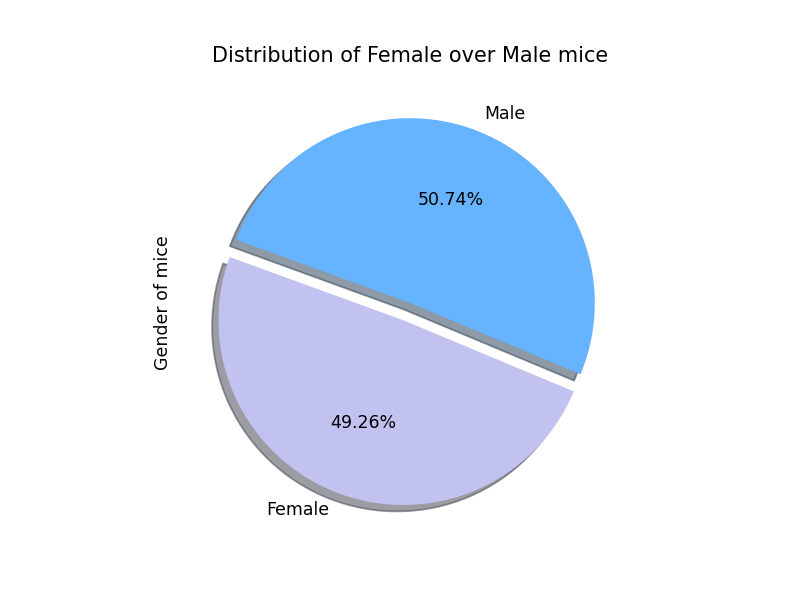

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_groups = mouse_study_clean_data.groupby(['Sex']).size()

fig1,ax3=plt.subplots()
ax3.gender_plot = mice_groups.plot(kind='pie', autopct='%.2f%%', startangle = 160,shadow=True,
                                   explode = (0.1,0),colors = ["#c2c2f0","#66b3ff"],
                                   title = 'Distribution of Female over Male mice')
ax3.set_ylabel("Gender of mice")
plt.show()

<IPython.core.display.Javascript object>


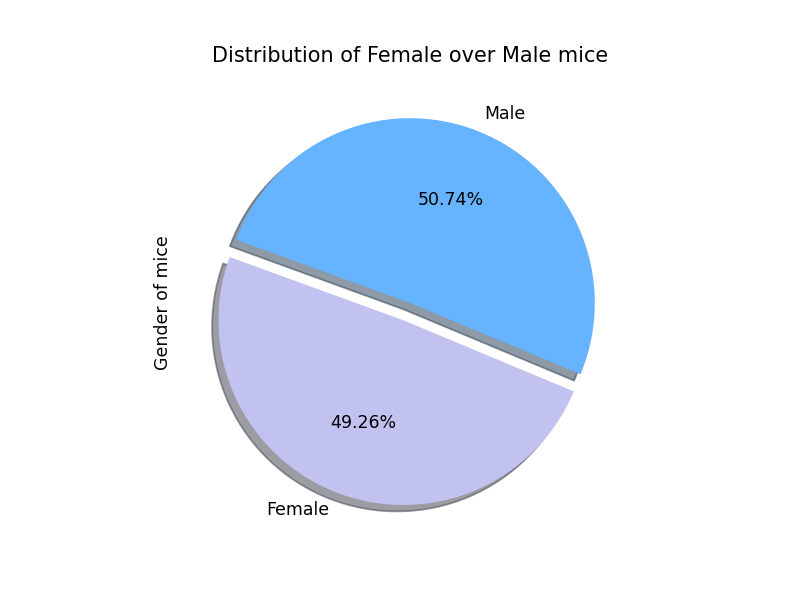

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_groups1 = mouse_study_clean_data.groupby(['Sex']).size().reset_index(name = 'Number')
mice_gender = mice_groups1["Sex"]
mice_count = mice_groups1["Number"]

fig1,ax4 = plt.subplots()
ax4.pie(mice_count,labels = mice_gender, autopct='%.2f%%', startangle = 160,shadow=True,explode = (0.1,0),
        colors = ["#c2c2f0","#66b3ff"])
ax4.set_title('Distribution of Female over Male mice')
ax4.set_ylabel("Gender of mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [57]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatment_regimen = mouse_study_clean_data.loc[mouse_study_clean_data["Drug Regimen"].isin(regimen_list)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = treatment_regimen.sort_values(["Mouse ID","Drug Regimen","Timepoint"]).groupby('Mouse ID').last()

tumor_volume_df = last_timepoint[["Drug Regimen","Timepoint","Tumor Volume (mm3)"]]
tumor_volume_df.head()

,Drug Regimen,Timepoint,Tumor Volume (mm3)
Mouse ID,,,
a203,Infubinol,45,67.973419
a251,Infubinol,45,65.525743
a275,Ceftamin,45,62.999356
a411,Ramicane,45,38.407618
a444,Ramicane,45,43.047543


In [58]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

outliers_df = pd.DataFrame({"Treatment Regimen":[],"IQR": [],"Lower Quartile": [],
                   "Upper Quartile":[],"Median value":[],"Lower bound":[],"Upper bound":[]})

for regimen in treatment_regimen:
    tumor_volume1 = tumor_volume_df.loc[tumor_volume_df['Drug Regimen'] == regimen,'Tumor Volume (mm3)']
    
    #Calculate the quartiles and IQR
    quartiles = tumor_volume1.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    median_v=quartiles[0.5]
    iqr = upperq-lowerq  
   
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    #Check for outliers in each drug and print the outlier's value
    for value in tumor_volume1:      
        if ((value < lower_bound) or (value > upper_bound)):
            print(f'The drug {regimen} has outliers. The value is: {value}\n')
            
    outliers_df=outliers_df.append({"Treatment Regimen":regimen,"IQR":iqr,"Lower Quartile":lowerq,
                  "Upper Quartile":upperq,"Median value":median_v,"Lower bound":lower_bound,
                  "Upper bound":upper_bound},ignore_index = True)

outliers_df = outliers_df.set_index("Treatment Regimen")
print(outliers_df)


# Locate the rows which contain mice on each drug and get the tumor volumes
regimen_capomulin = tumor_volume_df.loc[tumor_volume_df['Drug Regimen'] == 'Capomulin','Tumor Volume (mm3)'].values
regimen_ramicane = tumor_volume_df.loc[tumor_volume_df['Drug Regimen'] == 'Ramicane','Tumor Volume (mm3)'].values
regimen_infubinol = tumor_volume_df.loc[tumor_volume_df['Drug Regimen'] == 'Infubinol','Tumor Volume (mm3)'].values
regimen_ceftamin = tumor_volume_df.loc[tumor_volume_df['Drug Regimen'] == 'Ceftamin','Tumor Volume (mm3)'].values

# add subset 
tumor_vol_data=[regimen_capomulin, regimen_ramicane, regimen_infubinol, regimen_ceftamin]    

The drug Infubinol has outliers. The value is: 36.321345799999996

                         IQR  Lower Quartile  Upper Quartile  Median value  \
Treatment Regimen                                                            
Capomulin           7.781863       32.377357       40.159220     38.125164   
Ramicane            9.098537       31.560470       40.659006     36.561652   
Infubinol          11.477135       54.048608       65.525743     60.165180   
Ceftamin           15.577752       48.722078       64.299830     59.851956   

                   Lower bound  Upper bound  
Treatment Regimen                            
Capomulin            20.704562    51.832015  
Ramicane             17.912664    54.306811  
Infubinol            36.832905    82.741446  
Ceftamin             25.355450    87.666458  


<IPython.core.display.Javascript object>


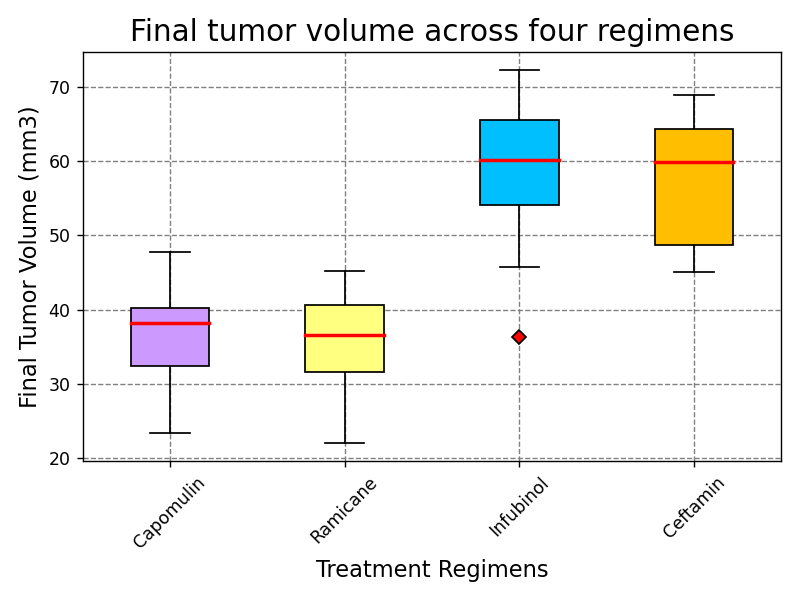

In [72]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax5 = plt.subplots()
bp = ax5.boxplot(tumor_vol_data, patch_artist = True)


for flier in bp['fliers']: 
    flier.set(marker ='D', markerfacecolor = 'r',color ='#e7298a')
    
for median in bp['medians']: 
    median.set(color ='red', linewidth = 2)

colors = ['#cc99ff', '#ffff80', '#00bfff', '#ffbf00']
for patch, color in zip(bp['boxes'], colors): 
    patch.set_facecolor(color)
    
ax5.set_xticklabels(treatment_regimen,rotation = 45)
ax5.set_title("Final tumor volume across four regimens",fontsize=17)
ax5.set_xlabel("Treatment Regimens",fontsize=13)
ax5.set_ylabel("Final Tumor Volume (mm3)",fontsize=13)
ax5.set_axisbelow(True)
ax5.yaxis.grid(color='gray', linestyle='dashed')
ax5.xaxis.grid(color='gray', linestyle='dashed')
plt.show()
plt.tight_layout()

## Line and Scatter Plots

Mouse List:
['s185' 'x401' 'm601' 'f966' 'u364' 'y793' 'r554' 'm957' 't565' 'i738'
 'w914' 'g288' 'l897' 'b742' 'b128' 'j246' 'j119' 'w150' 'v923' 'g316'
 's710' 'l509' 'r944' 'i557' 'r157']
Please pick mouse to find the treatment response:r554


<IPython.core.display.Javascript object>


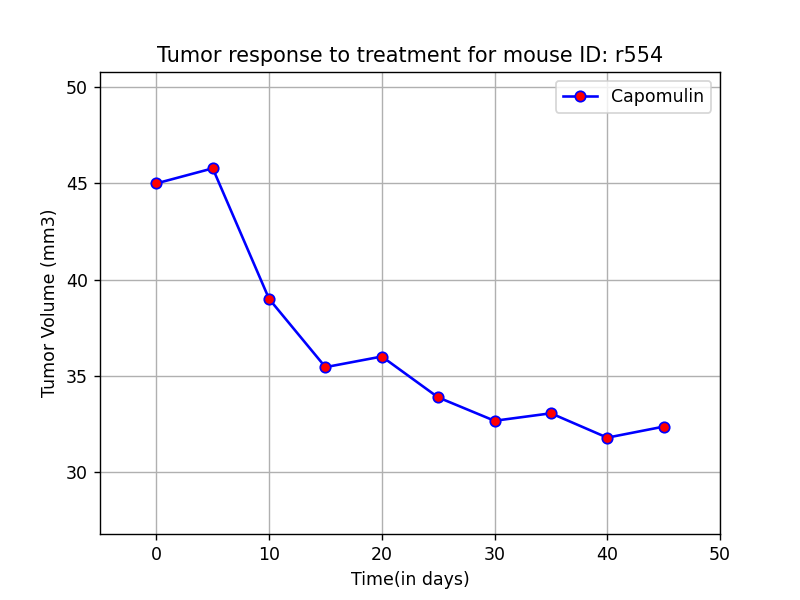

In [59]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_id = mouse_study_clean_data.loc[mouse_study_clean_data['Drug Regimen'] == "Capomulin"]['Mouse ID'].unique()
print("Mouse List:")
print(mouse_id)

mouse = input('Please pick mouse to find the treatment response:')

capomulin_treated = mouse_study_clean_data.loc[(mouse_study_clean_data['Drug Regimen'] == "Capomulin") 
                                               & (mouse_study_clean_data['Mouse ID'] == mouse)]
x_capomulin = capomulin_treated['Timepoint']
y_capomulin = capomulin_treated['Tumor Volume (mm3)']

fig1,ax8 = plt.subplots()
ax8.plot(x_capomulin, y_capomulin, color="blue", marker = 'o',markerfacecolor = "red",label = "Capomulin")
ax8.set_xlabel("Time(in days)")
ax8.set_ylabel("Tumor Volume (mm3)")
ax8.legend(loc="best")
ax8.set_xlim((min(x_capomulin)-5),(max(x_capomulin)+5))
ax8.set_ylim((min(y_capomulin)-5),(max(y_capomulin)+5))
ax8.set_title(f'Tumor response to treatment for mouse ID: {mouse}')

ax8.grid()
plt.show()

<IPython.core.display.Javascript object>


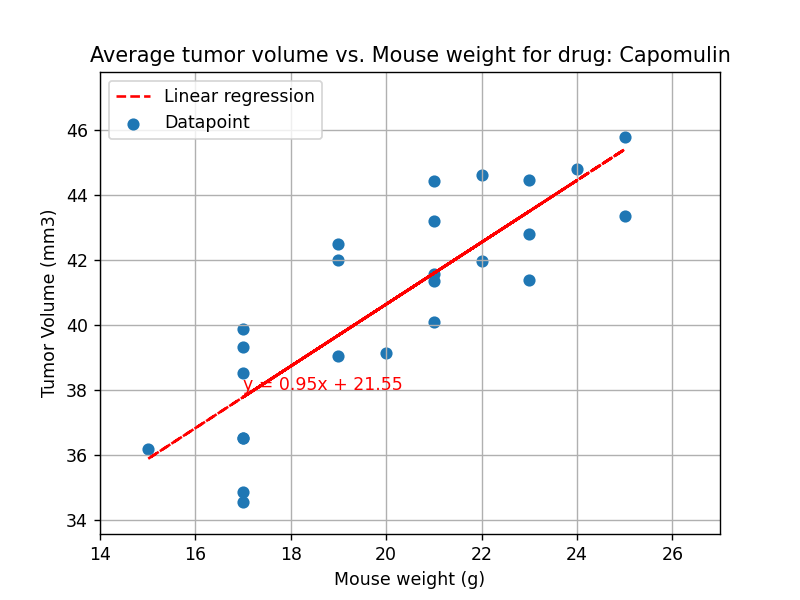

In [60]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_treated = mouse_study_clean_data.loc[(mouse_study_clean_data['Drug Regimen'] == "Capomulin")]
weight_vs_tvol = capomulin_treated.groupby(["Mouse ID","Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()

weight = weight_vs_tvol["Weight (g)"]
tumor_volume = weight_vs_tvol["Tumor Volume (mm3)"]

fig1,ax7 = plt.subplots()
ax7.scatter(weight,tumor_volume,label = 'Datapoint')
ax7.set_xlabel("Mouse weight (g)")
ax7.set_ylabel("Tumor Volume (mm3)")
ax7.set_title("Average tumor volume vs. Mouse weight for drug: Capomulin")
ax7.set_xlim((min(weight)-1),(max(weight)+2))
ax7.set_ylim((min(tumor_volume)-1),(max(tumor_volume)+2))
ax7.legend(loc = "upper left")
ax7.grid(True)
plt.show()

## Correlation and Regression

In [61]:
# Calculate the linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
tv_slope, tv_intercept, tv_rvalue, tv_pvalue, tv_std_err = st.linregress(weight, tumor_volume)

tv_regress_values = tv_slope * weight + tv_intercept
line_eq = "y = " + str(round(tv_slope,2)) + "x + " + str(round(tv_intercept,2))
ax7.plot(weight,tv_regress_values,"--",color='r',label = "Linear regression")
ax7.annotate(line_eq,(17,38),fontsize=10,color="red")
ax7.legend(loc="upper left")
plt.show()

In [62]:
#Calculate the correlation coefficient
#for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(weight,tumor_volume)
print(f'The correlation coefficient for mouse weight and average tumor volume is: {round(correlation[0],2)}')

#The mouse weight and average tumor volume has strong correlation

The correlation coefficient for mouse weight and average tumor volume is: 0.84
